In [30]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Flatten, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, MaxPooling2D, AveragePooling2D, BatchNormalization, LeakyReLU, Concatenate
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [6]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print("X_train.shape:", X_train.shape)
print("y_train.shape", y_train.shape)

X_train.shape: (60000, 28, 28)
y_train.shape (60000,)


In [7]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000,28,28,1)
print("X_train.shape:", X_train.shape)
print("X_test.shape", X_test.shape)

X_train.shape: (60000, 28, 28, 1)
X_test.shape (10000, 28, 28, 1)


In [8]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [9]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [35]:
#rlr = ReduceLROnPlateau(monitor='val_accuracy', mode = 'max', factor=0.5, min_lr=1e-7, verbose = 1, patience=5)
#es = EarlyStopping(monitor='val_accuracy', mode='max', verbose = 1, patience=50)
#mc = ModelCheckpoint('cnn_best_model.h5', monitor='val_accuracy', mode='max', verbose = 1, save_best_only=True)
rlr = ReduceLROnPlateau(monitor='accuracy', mode = 'max', factor=0.5, min_lr=1e-7, verbose = 1, patience=5)
es = EarlyStopping(monitor='accuracy', mode='max', verbose = 1, patience=50)
mc = ModelCheckpoint('cnn_best_model.h5', monitor='accuracy', mode='max', verbose = 1, save_best_only=True)

In [36]:
def build_model(lr = 0, mt = 0, dr = 0):
    model = Sequential(name = 'cnn_mnist')

    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(128, activation = "relu"))
    model.add(Dropout(dr))
    model.add(Dense(10, activation = "softmax"))
    opt = optimizers.SGD(lr = lr, momentum = mt)
    #opt = optimizers.RMSprop(lr = lr, decay = dc)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [37]:
model = build_model(lr = 0.01, mt = 0.8, dr = 0.5)

In [38]:
model.summary()

Model: "cnn_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        18

In [39]:
#data augmentation
datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=False,
                            vertical_flip=False
                            )
datagen.fit(X_train)

In [40]:
# run model
model.fit_generator(datagen.flow(X_train, y_train_cat, batch_size = 64),
                                 validation_data = (X_test, y_test_cat),
                                 steps_per_epoch = X_train.shape[0] // 64, 
                                 epochs = 400, verbose = 2,
                                 callbacks = [rlr, es, mc])

Epoch 1/400

Epoch 00001: accuracy improved from -inf to 0.78989, saving model to cnn_best_model.h5
937/937 - 17s - loss: 0.6443 - accuracy: 0.7899 - val_loss: 0.0570 - val_accuracy: 0.9814 - lr: 0.0100
Epoch 2/400

Epoch 00002: accuracy improved from 0.78989 to 0.92590, saving model to cnn_best_model.h5
937/937 - 17s - loss: 0.2459 - accuracy: 0.9259 - val_loss: 0.0400 - val_accuracy: 0.9867 - lr: 0.0100
Epoch 3/400

Epoch 00003: accuracy improved from 0.92590 to 0.94658, saving model to cnn_best_model.h5
937/937 - 17s - loss: 0.1833 - accuracy: 0.9466 - val_loss: 0.0309 - val_accuracy: 0.9900 - lr: 0.0100
Epoch 4/400

Epoch 00004: accuracy improved from 0.94658 to 0.95504, saving model to cnn_best_model.h5
937/937 - 17s - loss: 0.1535 - accuracy: 0.9550 - val_loss: 0.0330 - val_accuracy: 0.9902 - lr: 0.0100
Epoch 5/400

Epoch 00005: accuracy improved from 0.95504 to 0.96086, saving model to cnn_best_model.h5
937/937 - 17s - loss: 0.1331 - accuracy: 0.9609 - val_loss: 0.0422 - val_acc

In [24]:
def plot_model(history): 
    fig, axs = plt.subplots(1,2,figsize=(16,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'], 'c') 
    axs[0].plot(history.history['val_accuracy'],'m') 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'], 'c') 
    axs[1].plot(history.history['val_loss'], 'm') 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper right')
    plt.show()

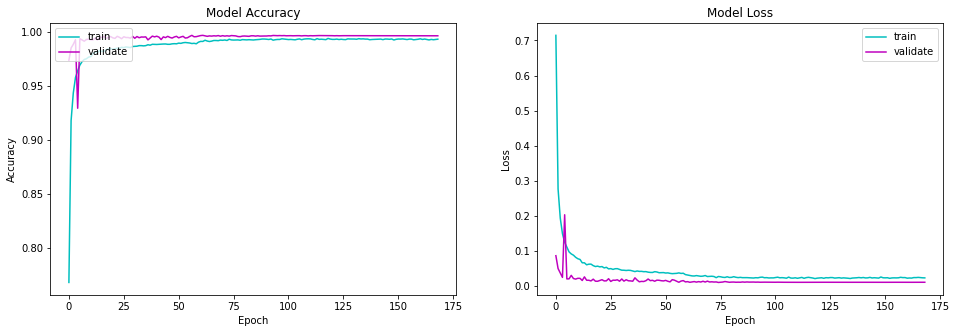

In [25]:
plot_model(model.history)

In [29]:
saved_model = load_model('cnn_best_model.h5')
train_loss, train_acc = saved_model.evaluate(X_train,  y_train_cat, verbose=2)
test_loss, test_acc = saved_model.evaluate(X_test,  y_test_cat, verbose=2)
print('Train Accuracy:', round(train_acc, 3))
print('Test Accuracy:', round(test_acc, 3))

1875/1875 - 4s - loss: 0.0052 - accuracy: 0.9986
313/313 - 1s - loss: 0.0105 - accuracy: 0.9965
Train Accuracy: 0.999
Test Accuracy: 0.997
